<a href="https://colab.research.google.com/github/konderal333/HGT-2022-EmDomArDon/blob/main/tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/konderal333/HGT-2022-EmDomArDon.git

Cloning into 'HGT-2022-EmDomArDon'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 82 (delta 41), reused 42 (delta 14), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/HGT-2022-EmDomArDon/cikkek_10k_cleanedv1.csv")

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.2 MB/s 
     |████████████████████████████████| 7.6 MB 37.7 MB/s 
     |████████████████████████████████| 163 kB 49.5 MB/s 


In [5]:
from transformers import AutoTokenizer, AutoModel

In [6]:
tokenizer = AutoTokenizer.from_pretrained("SZTAKI-HLT/hubert-base-cc")
model = AutoModel.from_pretrained("SZTAKI-HLT/hubert-base-cc")

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/272k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at SZTAKI-HLT/hubert-base-cc were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
!pip install quntoken
from quntoken import tokenize   #module to break text into sentences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.2 MB/s 


In [8]:
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
dict_of_tokens = {} 
#this dict will contain the article title as keys and the tokenized lists from the function below as values

def text_to_tokens(art_title, x):      
  #insert the text to tokenize; first breaks text into sentences, then makes a list of lists with the i-th element being the tokenization of the i-th sentence
  #dictionary is being used for faster computation and easier accessibility
  sentence_list = []
  token_list = []

  x = re.sub(r"(\.)([A-Z])", r'\1 \2', x) # fixes missings whitespaces between sentences
 
  for sen in nltk.tokenize.sent_tokenize(x):
    sentence_list.append(sen)
    token_list.append(tokenizer.tokenize(sen))

  dict_of_tokens[art_title] = token_list

In [10]:
df.head()

,Title,Headline,Textbody
0,Fájóan aktuális és elviselhetetlenül fe...,A friss Nobel-díjas Annie Ernaux könyvéből kés...,Az Esemény hazai szeptember végi mozis premier...
1,Brutális mértékben drágul a liba- és ka...,"Majdnem duplájába kerül, mint tavaly. Drágább ...",Majdnem duplájába kerülhet a Márton-napi libas...
2,"Két góllal vezetett a Bayern München, a...",Neuer kissé bizonytalanul jött ki az utolsó pe...,"Nagyon úgy tűnt, hogy a Bayern München ismét l..."
3,Antiszemita tartalom miatt korlátozták ...,"A rapper P. Diddyről állította azt, hogy a hát...",Korlátozást rakott a Meta Kanye West Instagram...
4,Meghalt egy néző az ózdi ralin,Elsodorta az egyik autó.,"Elsodortak egy nézőt a hétvégi ózdi ralin, és ..."


In [17]:
for i in range(len(df.Title)):
  text_to_tokens(df.Title[i].strip(), df.Textbody[i])

Hosszú a dict, ne hívd meg XDDDDDDDDD Majd csinájunk belőle dfet.

In [18]:
dict_of_tokens[df.Title[0].strip()]

[['Az',
  'Es',
  '##emény',
  'hazai',
  'szeptember',
  'végi',
  'mozi',
  '##s',
  'premier',
  '##je',
  'egyszerre',
  'örömteli',
  '##en',
  'és',
  'fáj',
  '##óan',
  'aktuális',
  '.'],
 ['Öröm',
  '##teli',
  ',',
  'mert',
  'a',
  'friss',
  'irodalmi',
  'Nobel',
  '-',
  'díja',
  '##s',
  'Ann',
  '##ie',
  'Er',
  '##na',
  '##ux',
  'önéletrajz',
  '##i',
  'regény',
  '##éből',
  'készült',
  ';',
  'és',
  'fáj',
  '##ó',
  ',',
  'mert',
  'a',
  'nemrég',
  'módosított',
  ',',
  'némileg',
  'szigor',
  '##ított',
  'abort',
  '##uszt',
  'érintő',
  'szabályozás',
  'fényében',
  'még',
  'inkább',
  'hús',
  '##ba',
  'vágó',
  'a',
  'főhős',
  '##nő',
  'terhesség',
  '##meg',
  '##szak',
  '##ító',
  'kál',
  '##vári',
  '##áját',
  'nézni',
  '.'],
 ['De',
  'a',
  'tavalyi',
  'vele',
  '##n',
  '##ce',
  '##i',
  'film',
  '##fesztiválon',
  'Arany',
  'Oroszl',
  '##án',
  '##nal',
  'díjazott',
  'mű',
  'ezek',
  'nélkül',
  'az',
  'aktu',
  '##alitá

In [22]:
# Some basic statistics about the number of tokens
import matplotlib.pyplot as plt
import statistics

number_of_tokens_all = []

for tokens in dict_of_tokens.values():
  length = 0
  for lists in tokens:
    length += len(lists)
  number_of_tokens_all.append(length)


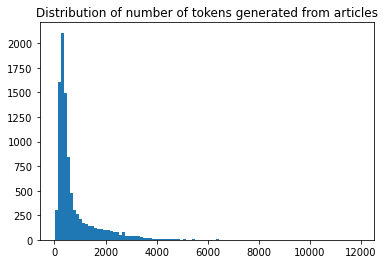

In [24]:
plt.hist(number_of_tokens_all, bins=100, density=False)
plt.title('Distribution of number of tokens generated from articles')
plt.show()

In [25]:
print("Median of tokens: ", statistics.median(number_of_tokens_all))
print("Mean of tokens: ", statistics.mean(number_of_tokens_all))

Median of tokens:  423.0
Mean of tokens:  766.442833123161


In [27]:
# number of articles with tokens more that 510:
print(np.sum(np.asarray(number_of_tokens_all) > 510))

3842
